In [1]:
import numpy as np
tip=('id' ,'num_p', 'mvir', 'mbound_vir', 'rvir', 'vmax', 'rvmax' ,'vrms' ,'x', 'y'
     ,'z' ,'vx' ,'vy' ,'vz' , 'Jx', 'Jy', 'Jz', 'E' ,'Spin' ,'PosUncertainty', 'VelUncertainty' ,'bulk_vx', 
     'bulk_vy', 'bulk_vz', 'BulkVelUnc', 'n_core' ,'m200b' ,'m200c' ,'m500c' ,'m2500c' ,'Xoff',' Voff' ,
     'spin_bullock' ,'b_to_a',' c_to_a',' A[x]' ,'A[y]' ,'A[z]' ,'b_to_a(500c)' ,'c_to_a(500c)' ,'A[x](500c)' ,
     'A[y](500c)' ,'A[z](500c)' ,'Rs' ,'Rs_Klypin', 'T/|U|',' M_pe_Behroozi', 'M_pe_Diemer',' Halfmass_Radius',
     'idx' ,'i_so' ,'i_ph' ,'num_cp' ,'mmetric')
tip[5]

'vmax'

In [2]:
doubl=['float64' for i in tip]

In [3]:
halo_s=np.loadtxt('./gevolution-dev-master-single/output-64grid-single/6', 
                  dtype={'names': tip, 'formats':doubl})
halo_d=np.loadtxt('./gevolution-dev-master-double/output-64-double/6', 
                  dtype={'names': tip, 'formats':doubl})

In [29]:
print(halo_s['x'])
halo_s['x'][1]


[  15.473294   18.915535  143.394562   45.181938  121.021454  110.108665
  140.094696   17.354137    5.001788  145.139465  127.063728   40.194229
  179.171677  210.086288  190.507294  229.105118  220.155792  298.067871
  260.210846  262.041565  220.108948  211.256165  265.428833  271.291321
  309.76236   287.945984  202.412018  179.753403  190.001511  300.524536
   60.990273  154.099396  152.07486    70.936279  154.7397    155.123993
   10.106009  135.307144  135.232101  124.324547   33.354752   60.19014
  119.833183  185.019333  240.937958  298.813873  316.940826  293.517059
  319.672272  305.31131 ]


18.915534999999998

In [7]:
r_s=np.sqrt(halo_s['x']**2+halo_s['y']**2+halo_s['z']**2)
r_d=np.sqrt(halo_d['x']**2+halo_d['y']**2+halo_d['z']**2)

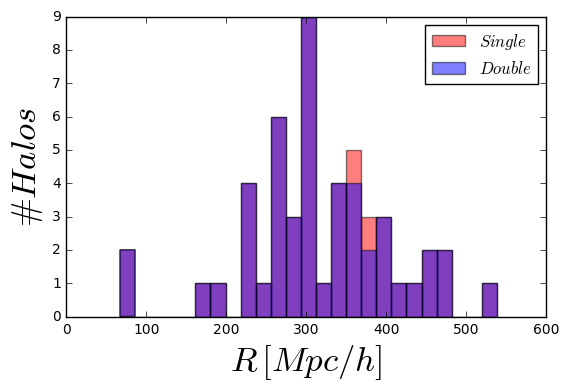

In [42]:
import matplotlib.pylab as plt
%matplotlib inline
plt.hist(r_s,25,color='red',alpha=0.5,label=r'$Single$')
plt.hist(r_d,25,color='blue',alpha=0.5,label=r'$Double$')
plt.legend()
plt.ylabel('$\# Halos$',fontsize=25)
plt.xlabel(r'$R \, [Mpc/h]$',fontsize=25)
#plt.ylim(1,20)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)

plt.savefig('HistR.jpg')


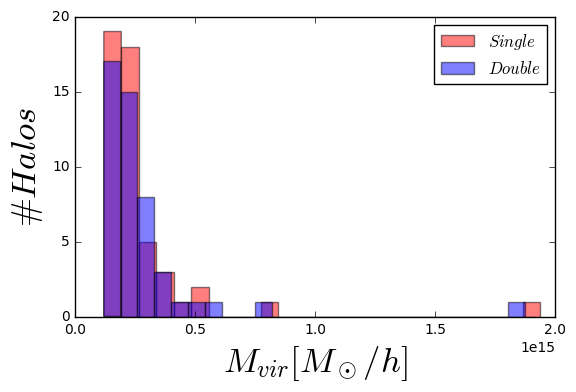

In [9]:
plt.hist(halo_s['mvir'],25,color='red',alpha=0.5,label=r'$Single$')
plt.hist(halo_d['mvir'],25,color='blue',alpha=0.5
    ,label=r'$Double$')
plt.legend()
plt.ylabel(r'$\# Halos$',fontsize=25)
plt.xlabel(r'$M_{vir}  [M_\odot /h]$',fontsize=25)
#plt.ylim(1,20)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.savefig('HistMass.jpg')

In [10]:
from mpl_toolkits.mplot3d import Axes3D
Axes3D.scatter(halo_s['x'],halo_s['y'] , halo_s['z'])

TypeError: unbound method scatter() must be called with Axes3D instance as first argument (got ndarray instance instead)

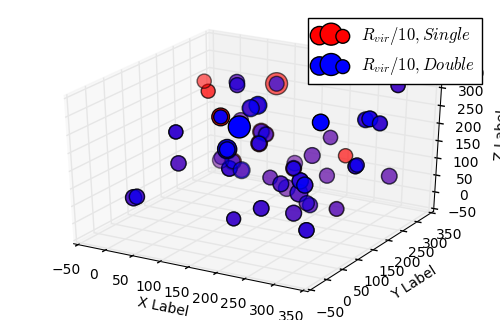

In [18]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(halo_s['x'],halo_s['y'] , halo_s['z'],c='red',s=halo_s['rvir']/10,label='$R_{vir}/10, Single$')
ax.scatter(halo_d['x'],halo_d['y'] , halo_d['z'],c='blue',s=halo_s['rvir']/10,label='$R_{vir}/10, Double$')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.legend()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.savefig('Volume.jpg')

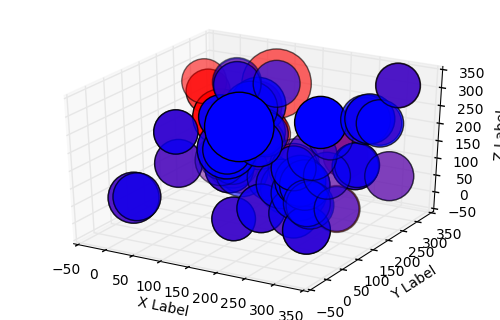

In [30]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(halo_s['x'],halo_s['y'] , halo_s['z'],c='red',s=halo_s['rvir'],label='$Single$')
ax.scatter(halo_d['x'],halo_d['y'] , halo_d['z'],c='blue',s=halo_s['rvir'],label='$ Double$')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.savefig('Halos-real.jpg')

In [13]:
halo_s.shape

(50,)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

halo_n=halo_s[:48]
fig = plt.figure()
ax = fig.gca(projection='3d')

x=halo_n['x']
y =halo_n['y']
z= halo_n['z']

u= halo_d['x']

v= halo_d['y']
w=halo_d['z']
ax.quiver(np.zeros(halo_d.shape), np.zeros(halo_d.shape), np.zeros(halo_d.shape), u, v, w ,color='r',length=1)
plt.xlim(-320,320)
plt.ylim(-320,320)
#plt.zlim(-320,320)
plt.show()

In [57]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
   
ax.scatter(halo_s['x'],halo_s['y'] , halo_s['z'],c='red',s=halo_s['rvir']/10)
ax.scatter(halo_d['x'],halo_d['y'] , halo_d['z'],c='blue',s=halo_s['rvir']/10)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.savefig('Halos-real.jpg')